<a href="https://colab.research.google.com/github/sakamrani2020/Data_Science/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Industry:** Finance and economic
**Department:** Marketing Pain points     
**Problem:** Customer Churn Prediction

**Problem Statement:** Customers are leaving the company, impacting revenue and growth goals for the finance and economics marketing team. The team needs to predict which customers might leave, so they can keep them by using smart strategies.

**Objective:**
Create a system that tells us which customers might leave soon. So we can do things to make them stay, protect our revenue, and keep growing.

**Dataset:**
The **Telco Customer Churn dataset** is a collection of customer data from a telecommunications company, providing insights into customer behavior and subscription details. Each entry in the dataset represents a customer and includes information such as contract details (e.g., contract length, type), usage patterns (e.g., monthly charges, total charges), and customer demographics (e.g., gender, seniority). The key feature is the indication of whether a customer has churned or not, serving as the target variable for predictive modeling.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Telco Customer Churn dataset
zip_file_path = "/content/archive.zip"
df = pd.read_csv(zip_file_path, compression='zip')

print("Dataset Preview:")
print(df.head().to_string(index=False))
print("\n")
print("Necessary Attributes:")
selected_columns = ['customerID', 'gender', 'tenure', 'MonthlyCharges', 'Churn']
display_df = df[selected_columns]
print("Dataset Preview:")
print(display_df.head().to_string(index=False, justify='center'))

# Data preprocessing
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


Dataset Preview:
customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService    MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies       Contract PaperlessBilling             PaymentMethod  MonthlyCharges TotalCharges Churn
7590-VHVEG Female              0     Yes         No       1           No No phone service             DSL             No          Yes               No          No          No              No Month-to-month              Yes          Electronic check           29.85        29.85    No
5575-GNVDE   Male              0      No         No      34          Yes               No             DSL            Yes           No              Yes          No          No              No       One year               No              Mailed check           56.95       1889.5    No
3668-QPYBK   Male              0      No         No       2          Yes               No             DSL            Yes          Y

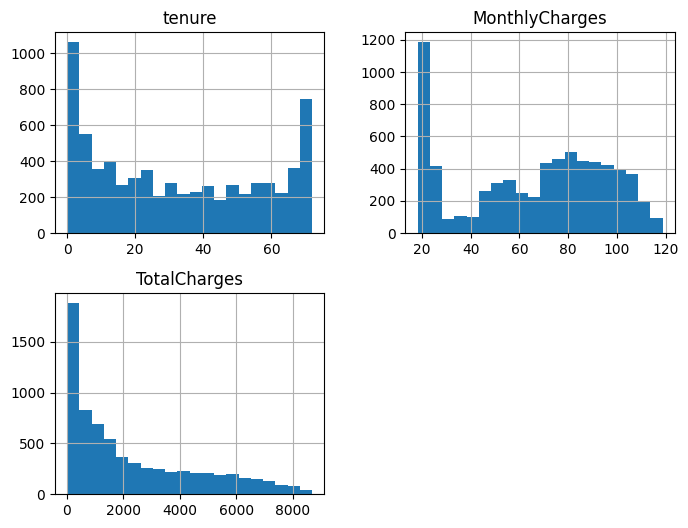

In [ ]:
#Histograms
import matplotlib.pyplot as plt
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(8, 6), bins=20)
plt.show()


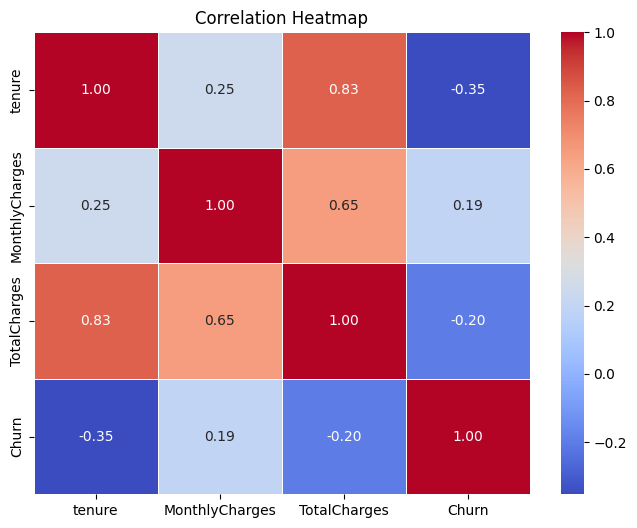

In [ ]:
#Correlation Heatmap
import seaborn as sns

# Encode 'Churn' numerically
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select relevant columns for correlation analysis
correlation_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_matrix = df[correlation_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:",accuracy)
print("\n")
print("Classification Report:\n",classification_report(y_test, predictions))

Model Accuracy: 0.7892122072391767


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



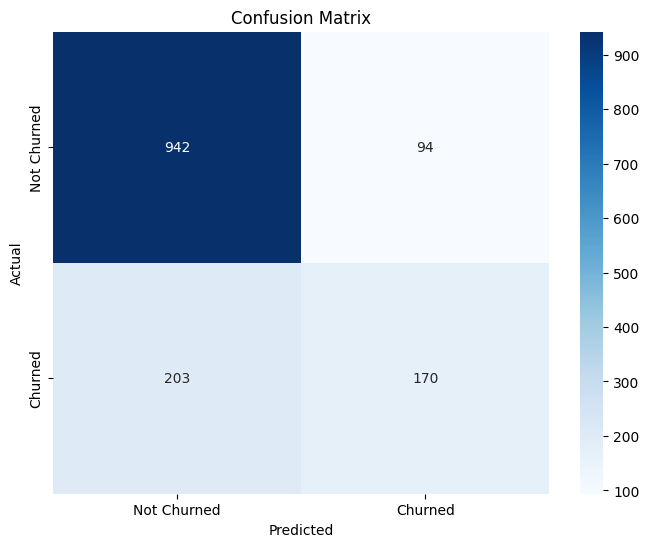

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


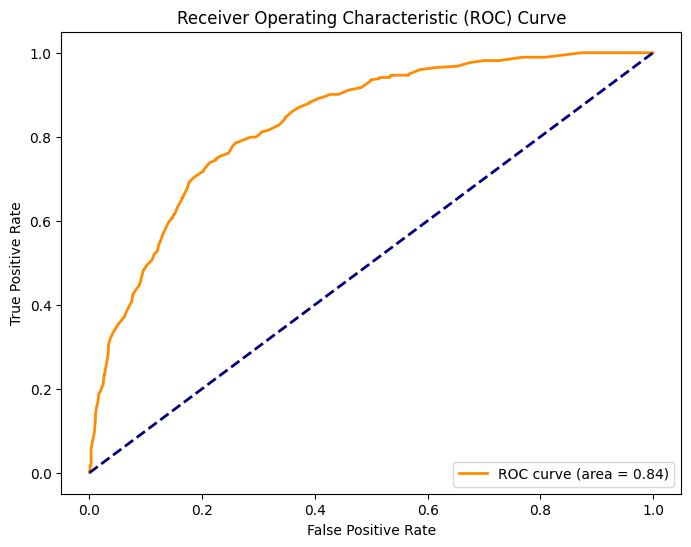

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()